In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw - samples 1,099)
 - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806)
 - max_length_serial: 205 - max_duration: 578.23[days]
   |▏       | SLSN - 21/1,099 (1.91%)
   |█████▊  | SNIa - 799/1,099 (72.70%)
   |▎       | SNIbc - 51/1,099 (4.64%)
   |█▋      | merSNII - 228/1,099 (20.75%)
(raw_train - samples 877)
 - samples: 877 - obs samples: 24,182 (g: 10,010 - r: 14,172)
 - max_length_serial: 205 - max_duration: 578.23[days]
   |▏       | SLSN - 16/877 (1.82%)
   |█████▊  | SNIa - 639/877 (72.86%)
   |▎       | SNIbc - 40/877 (4.56%)
   |█▋      | merSNII - 182/877 (20.75%)
(raw_val - samples 222)
 - samples: 222 - obs samples: 6,164 (g: 2,530 - r: 3,634)
 - max_length_serial: 108 - max_duration: 489.71[days]
   |▏       | SLSN - 5/222 (2.25%)
   |██

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


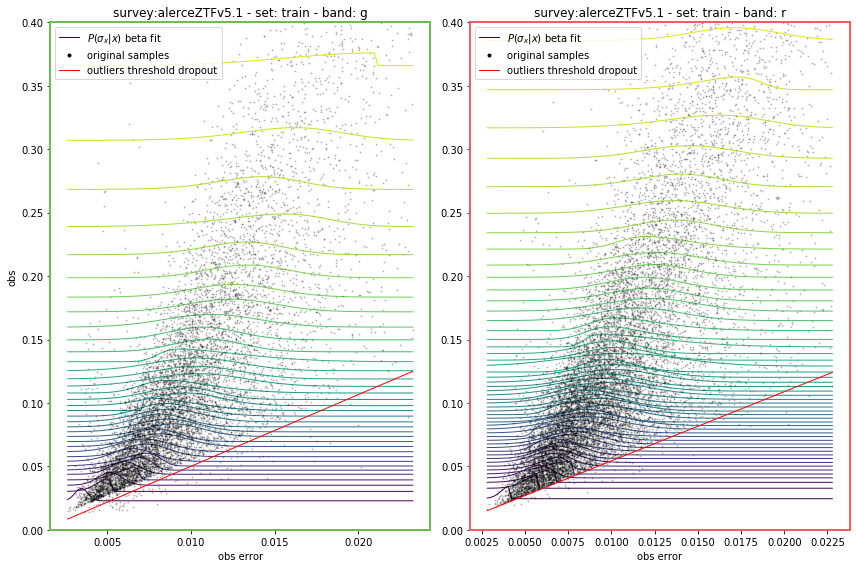

In [64]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


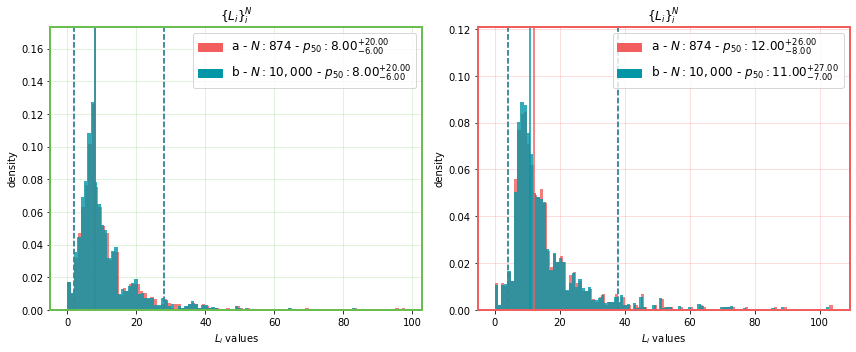

In [65]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
from lchandler.plots.plots import plot_length_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

In [6]:
'ZTF19abajxet'

'ZTF19abajxet'

In [ ]:
%load_ext autoreload
%autoreload 2
import lchandler.synthetic.synthetic_curve_generators
from lchandler.synthetic.synthetic_curve_generators import SynSNeGeneratorCF, SynSNeGeneratorMCMC
from lchandler.plots.lc import plot_lightcurve
from flamingchoripan.datascience.statistics import XError
import matplotlib.pyplot as plt
from lchandler import C_

set_name = 'train'
lc_set = lcdataset[set_name]
lcobj_name = lc_set.get_random_lcobj_name()
#lcobj_name = 'ZTF19abajxet'
print(lcobj_name)
lcobj = lc_set[lcobj_name]
band_names = lc_set.band_names
new_bounds = 1
#sne_generator = SynSNeGeneratorCF(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
sne_generator = SynSNeGeneratorMCMC(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
new_lcobjs = sne_generator.sample_curves(32, uses_pm_obs=1)

fig, ax = plt.subplots(1,1,figsize=(13,5))
for b in band_names:
    plot_lightcurve(ax, lcobj, b)
    for new_lcobj in new_lcobjs:
        ax.plot(new_lcobj.get_b(b).days, new_lcobj.get_b(b).obs, alpha=0.2, lw=1, c=C_.COLOR_DICT[b])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ZTF18abltdkd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/opimentel/anaconda3/envs/lchandler/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


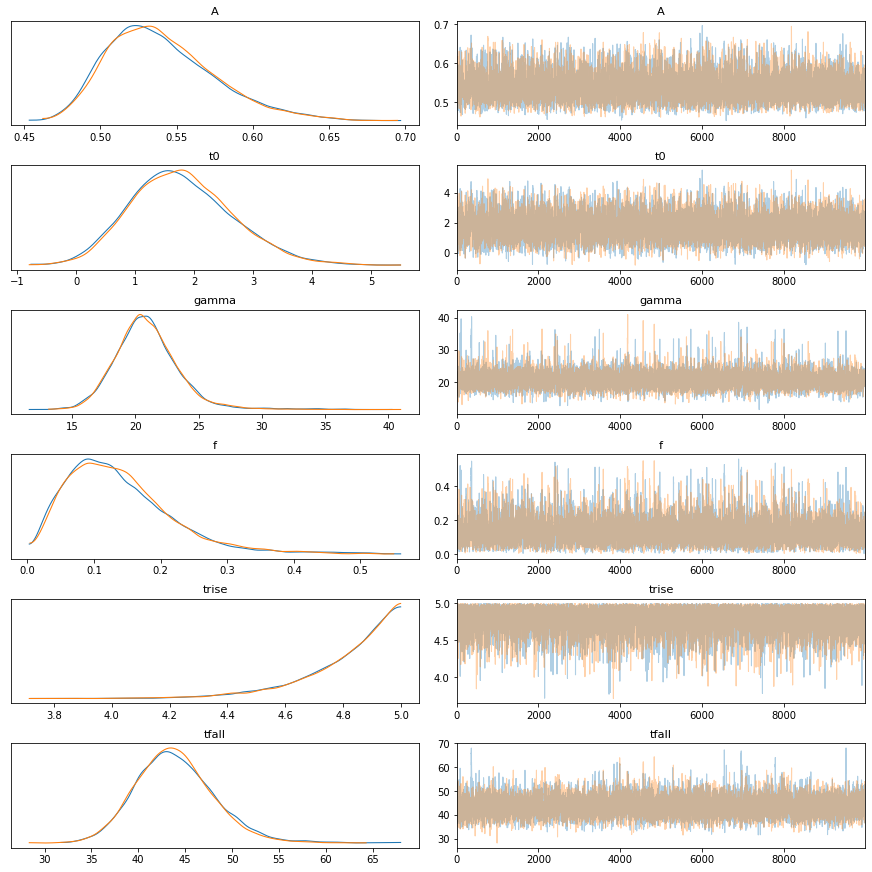

In [14]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_mcmc_trace

plot_mcmc_trace(sne_generator.mcmc_trace_bdict, 'g')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

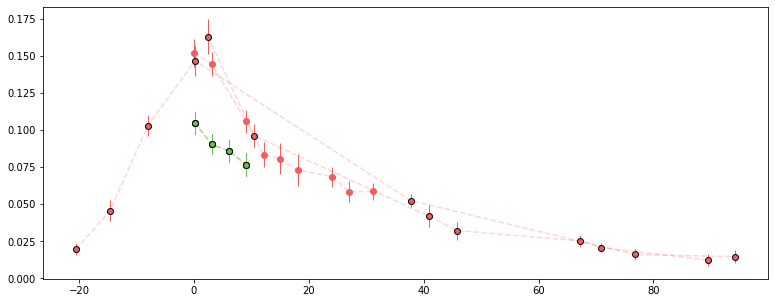

In [15]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_curve_generators import SynSNeGeneratorCF, SynSNeGeneratorMCMC
from lchandler.plots.lc import plot_lightcurve
from flamingchoripan.datascience.statistics import XError
import matplotlib.pyplot as plt
from lchandler import C_

lcobj = lcdataset['raw'].get_random_lcobj(return_key=0)
band_names = lcdataset['raw'].band_names
sne_generator = SynSNeGeneratorCF(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict)
#sne_generator = SynSNeGeneratorMCMC(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict)
new_lcobjs = sne_generator.sample_curves(2)

fig, ax = plt.subplots(1,1,figsize=(13,5))
for b in band_names:
    plot_lightcurve(ax, lcobj, b)
    for new_lcobj in new_lcobjs:
        plot_lightcurve(ax, new_lcobj, b, is_synthetic=1)
        
plt.plot()

# generate synth data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


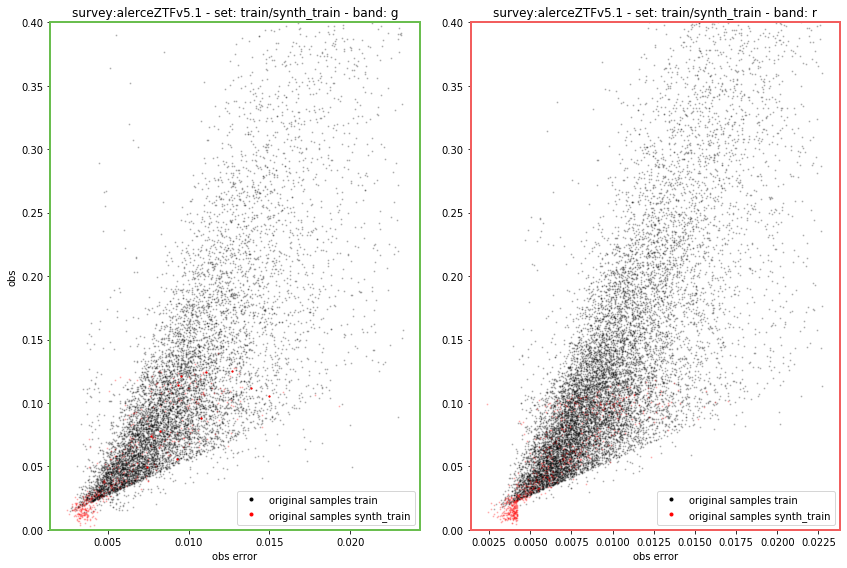

In [61]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [60]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generator import generate_synthetic_dataset

sd_kwargs = {
    #'get_from_synthetic':False,
    'synthetic_samples_per_curve':64,
    #'method':'curve_fit',
    'method':'mcmc',
    #desired_class_samples:2000,
    #desired_class_samples = 1000; get_from_synthetic = True # for umap
}
generate_synthetic_dataset(lcdataset, 'train', obse_sampler_bdict, length_sampler_bdict, **sd_kwargs)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|          | 0/874 [?it/s, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acfwynw]

There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


  0%|          | 2/874 [140.89s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acyxnyw]

KeyboardInterrupt: 

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)